In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/train.csv')

## Wrangling and Exploration

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
missing_vals_count = df.isnull().sum()

In [7]:
missing_cols = missing_vals_count[missing_vals_count > 0]

In [8]:
missing_cols

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [12]:
for col in missing_cols.index:
    print(col)
    print(df[col].sample(10))

LotFrontage
1011     75.0
1349     50.0
6        75.0
619      85.0
51       52.0
694      51.0
183      63.0
1174     80.0
1048    100.0
803     107.0
Name: LotFrontage, dtype: float64
Alley
757     NaN
382     NaN
1314    NaN
586     NaN
40      NaN
308     NaN
894     NaN
1411    NaN
415     NaN
379     NaN
Name: Alley, dtype: object
MasVnrType
1131       None
451        None
140        None
492        None
1173       None
814        None
705        None
1194      Stone
622     BrkFace
1227    BrkFace
Name: MasVnrType, dtype: object
MasVnrArea
1374      0.0
843       0.0
336     200.0
1146     85.0
13      306.0
798     860.0
325       0.0
460     110.0
718     651.0
232     297.0
Name: MasVnrArea, dtype: float64
BsmtQual
295     TA
317     Gd
115     Gd
791     Gd
519     Gd
942     Gd
71      TA
1009    TA
113     Gd
924     Gd
Name: BsmtQual, dtype: object
BsmtCond
863     TA
1198    TA
1289    TA
1430    Gd
174     Fa
1123    TA
171     Gd
681     TA
766     TA
252     TA
Name: 

In [13]:
df['BedroomAbvGr'].value_counts()

3    804
2    358
4    213
1     50
5     21
6      7
0      6
8      1
Name: BedroomAbvGr, dtype: int64

In [19]:
df[df['BedroomAbvGr'] == 0][['LotArea','MasVnrArea']]

,LotArea,MasVnrArea
53,50271,0.0
189,4923,0.0
634,6979,0.0
1163,12900,0.0
1213,10246,0.0
1270,23595,0.0


There are 6 properties with BedroomAbvGr = 0, looking at the LotArea and MasVnrArea, this indicates that they might be empty lots with no building

In [78]:
df['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [157]:
df['PoolArea'].value_counts()

0      1453
738       1
648       1
576       1
555       1
519       1
512       1
480       1
Name: PoolArea, dtype: int64

In [158]:
df[df['PoolArea'] > 0]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
197,198,75,RL,174.0,25419,Pave,NaN,Reg,Lvl,AllPub,...,512,Ex,GdPrv,NaN,0,3,2006,WD,Abnorml,235000
810,811,20,RL,78.0,10140,Pave,NaN,Reg,Lvl,AllPub,...,648,Fa,GdPrv,NaN,0,1,2006,WD,Normal,181000
1170,1171,80,RL,76.0,9880,Pave,NaN,Reg,Lvl,AllPub,...,576,Gd,GdPrv,NaN,0,7,2008,WD,Normal,171000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
1386,1387,60,RL,80.0,16692,Pave,NaN,IR1,Lvl,AllPub,...,519,Fa,MnPrv,TenC,2000,7,2006,WD,Normal,250000
1423,1424,80,RL,NaN,19690,Pave,NaN,IR1,Lvl,AllPub,...,738,Gd,GdPrv,NaN,0,8,2006,WD,Alloca,274970


In [159]:
df['YearBuilt'].value_counts()

2006    67
2005    64
2004    54
2007    49
2003    45
        ..
1906     1
1911     1
1913     1
1917     1
1872     1
Name: YearBuilt, Length: 112, dtype: int64

In [215]:
df['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [226]:
df[df['LotFrontage'].isnull()][['Street', 'MasVnrArea', 'LotArea','BedroomAbvGr','GrLivArea']]

,Street,MasVnrArea,LotArea,BedroomAbvGr,GrLivArea
7,Pave,240.0,10382,3,2090
12,Pave,0.0,12968,2,912
14,Pave,212.0,10920,2,1253
16,Pave,180.0,11241,2,1004
24,Pave,0.0,8246,3,1060
31,Pave,0.0,8544,3,1228
42,Pave,0.0,9180,2,884
43,Pave,0.0,9200,3,938
50,Pave,0.0,13869,3,1470
64,Pave,573.0,9375,3,2034


In [228]:
df['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [231]:
df['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [230]:
missing_cols

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [232]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### Quality

There are a number of columns with missing values such as `LotFrontage, Alley and Fence`, however, these missing values might not be an indication of error, it might be that the property simply does not have a fence for example. As such, we need to take great care in imputing these missing values.

Alley, PoolQC, Fence, MiscFeature are missing on a lot of properties, we will drop these columns as it might not contribute much to model prediction

Missing Lot Frontage will be imputed with 0, this might indicate the properties dont have any frontage

MasVnrType and MasVnrArea will be imputed with most frequent and median, this might be a data collection error given the number of missings

Variables related to basement will be imputed 0 or "None" to indicate they are not present

Electrical will be imputed with most frequent as there is only 1 missing value, having no electricity is unlikely

FireplaceQu will be imputed with "None"

Garage related variables will be imputed with 0 or "None" to indicate not present


## Visualization

### Price Distribution for 1 - 3 BR

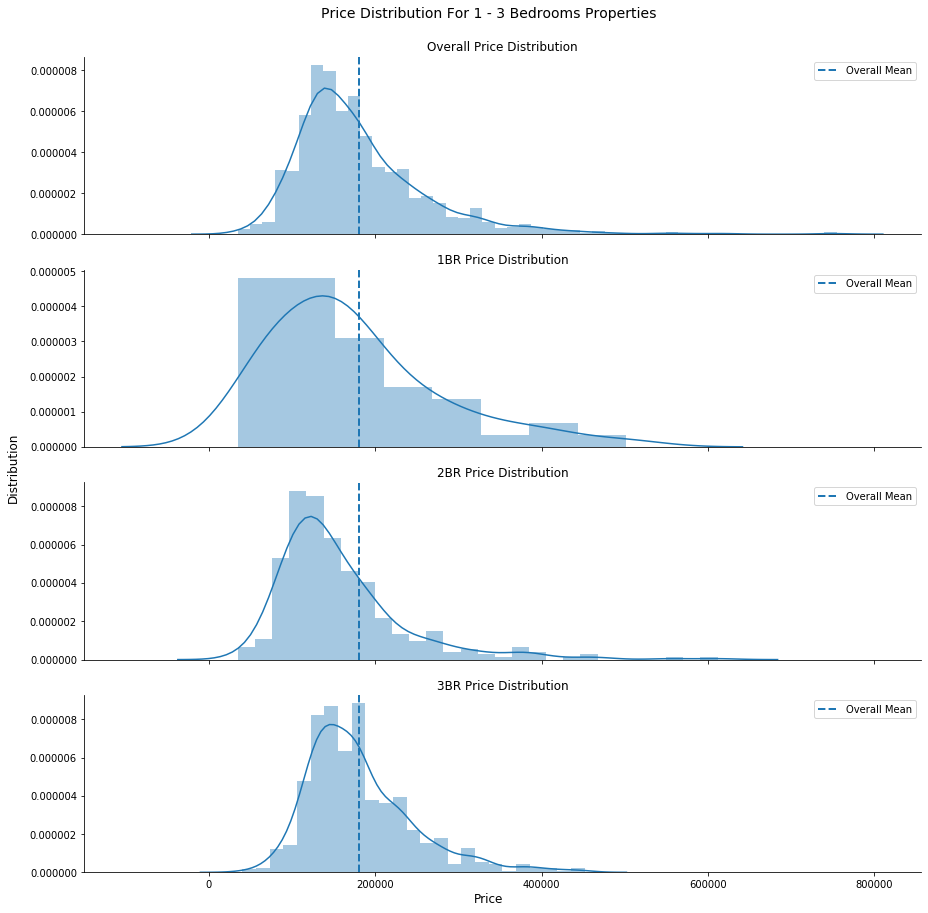

In [75]:
fig, (ax0,ax1,ax2,ax3) = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(15,15))
sns.distplot(df['SalePrice'], ax=ax0)
sns.distplot(df[df['BedroomAbvGr'] == 1]['SalePrice'], ax=ax1)
sns.distplot(df[df['BedroomAbvGr'] == 2]['SalePrice'], ax=ax2)
sns.distplot(df[df['BedroomAbvGr'] == 3]['SalePrice'], ax=ax3)

overall_mean_price = df['SalePrice'].mean()
ax0.set(title='Overall Price Distribution', xlabel='')
ax0.axvline(x=overall_mean_price, label='Overall Mean', linestyle="--", linewidth=2)
ax0.legend()

ax1.set(title='1BR Price Distribution', xlabel='')
ax1.axvline(x=overall_mean_price, label='Overall Mean', linestyle="--", linewidth=2)
ax1.legend()

ax2.set(title='2BR Price Distribution', xlabel='')
ax2.axvline(x=overall_mean_price, label='Overall Mean', linestyle="--", linewidth=2)
ax2.legend()

ax3.set(title='3BR Price Distribution', xlabel='')
ax3.axvline(x=overall_mean_price, label='Overall Mean', linestyle="--", linewidth=2)
ax3.legend()

fig.text(0.5, 0.1, 'Price', ha='center', va='center', fontsize=12)
fig.text(0.06, 0.5, 'Distribution', ha='center', va='center', rotation='vertical', fontsize=12)
fig.text(0.5, 0.92,'Price Distribution For 1 - 3 Bedrooms Properties', va='center', ha='center', fontsize=14)

sns.despine()

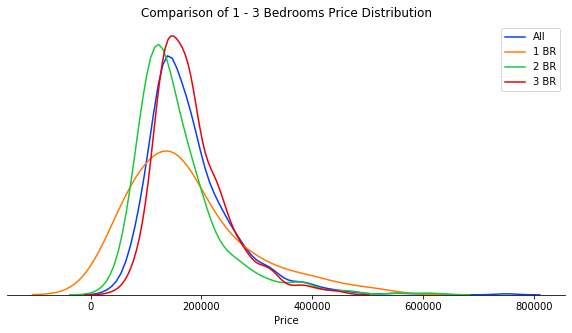

In [76]:
palette = sns.palettes.SEABORN_PALETTES['bright']
fig, ax = plt.subplots(figsize=(10,5))
sns.distplot(df['SalePrice'], ax=ax, hist=False, label="All", color=palette[0])
for i in range(3): 
    sns.distplot(df[df['BedroomAbvGr'] == i+1]['SalePrice'], ax=ax, hist=False, label=(str(i+1) + " BR"), color=palette[i+1])

ax.legend()
ax.set(yticks=[], xlabel='Price', title='Comparison of 1 - 3 Bedrooms Price Distribution')
sns.despine(left=True)

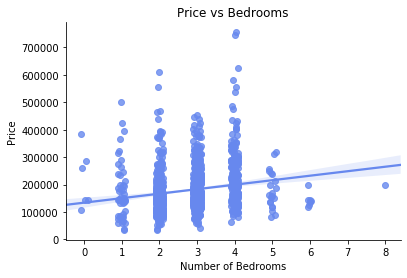

In [213]:
sns.regplot(data=df, x='BedroomAbvGr', y='SalePrice', x_jitter=0.1, y_jitter=0.1)
plt.title('Price vs Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
sns.despine()

### Least Expensive Neighborhood

In [149]:
neighborhood_mean_price = df.groupby('Neighborhood')['SalePrice'].mean().sort_values(ascending=False)

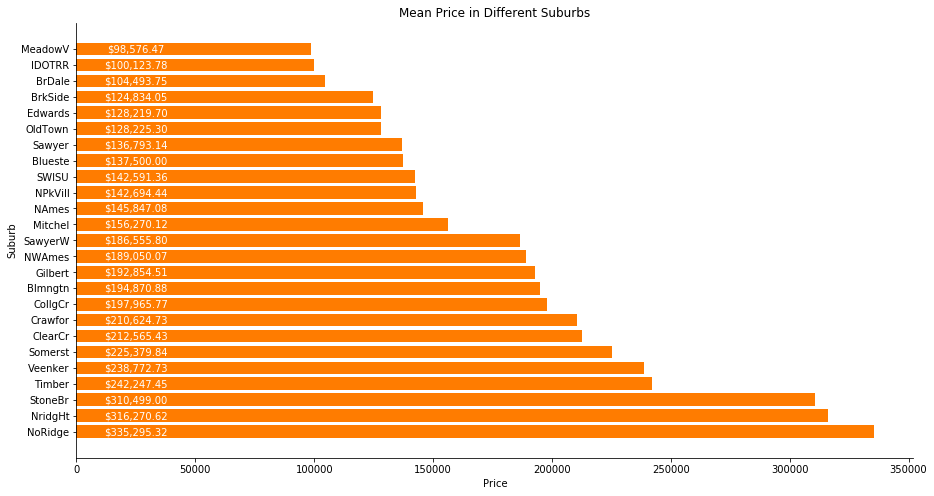

In [154]:
plt.figure(figsize=(15,8))

neighborhood_values = np.arange(0, len(neighborhood_mean_price))
bar_values = neighborhood_mean_price.values
plt.barh(neighborhood_values, bar_values, tick_label=neighborhood_mean_price.index, color=palette[1])

locs, labels = plt.yticks()

for loc, label in zip(locs, labels):
    bar_value = neighborhood_mean_price[label.get_text()]
    format_value = '${:,.2f}'.format(bar_value)
    plt.text(25000, loc - 0.2, format_value, ha='center', color='white')
    
plt.title("Mean Price in Different Neighborhood")
plt.xlabel("Price")
plt.ylabel("Suburb")
sns.despine()

### Heatmap for Number of Bedrooms vs Neighborhood

In [113]:
ct_counts = df.groupby(['Neighborhood', 'BedroomAbvGr']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index = 'Neighborhood', columns = 'BedroomAbvGr', values = 'count')

Text(0.5, 69.0, 'Number of Bedrooms')

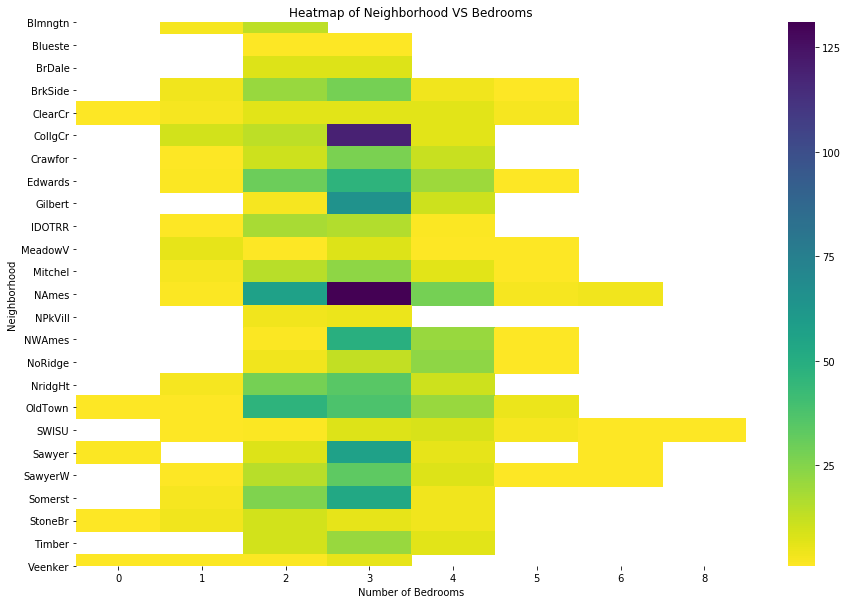

In [156]:
plt.figure(figsize=(15,10))
sns.heatmap(ct_counts, cmap='viridis_r')
plt.title("Heatmap of Neighborhood VS Bedrooms")
plt.xlabel('Number of Bedrooms')

### Year Built

In [ ]:
sns.set_palette('coolwarm')
palette = sns.color_palette()

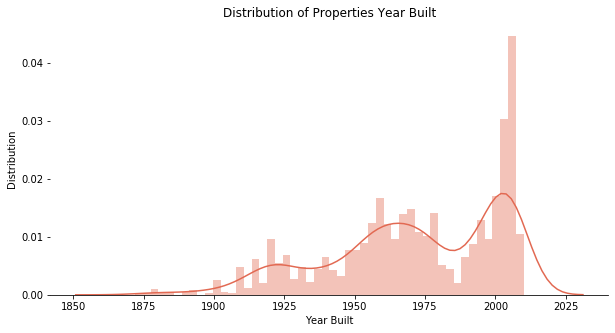

In [195]:
plt.figure(figsize=(10,5))
sns.distplot(df['YearBuilt'], bins=50, color=palette[5])
sns.despine(left=True)
plt.title("Distribution of Properties Year Built")
plt.ylabel("Distribution")
plt.xlabel("Year Built");

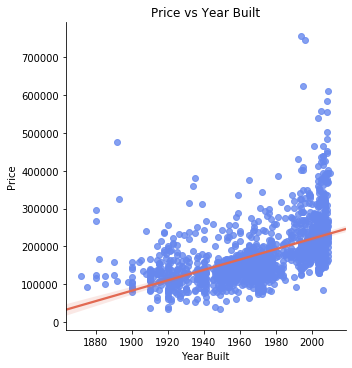

In [200]:
sns.lmplot(data=df, x='YearBuilt', y='SalePrice', palette=palette, line_kws={'color': palette[5]})
plt.title("Price vs Year Built")
plt.xlabel("Year Built")
plt.ylabel("Price");

## Prediction Model 1

In [243]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

We will built a simple regression model as a starter model to predict Sale Price, we will use manual feature selection based on domain knowledge on how properties might be priced

In [233]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [235]:
# majority is pave, we will skip this feature
df['Street'].value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [236]:
# only 1 row with different value, skip this feature
df['Utilities'].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [237]:
cols_for_x = ['LotFrontage', 'LotArea', 'BedroomAbvGr', 'FullBath', 'HalfBath', 'YearBuilt', 'GarageCars']

In [240]:
for col in cols_for_x:
    print(col, df[col].dtype)

LotFrontage float64
LotArea int64
BedroomAbvGr int32
FullBath int64
HalfBath int64
YearBuilt int64
GarageCars int64


In [370]:
df_train = df.copy()

In [371]:
X = df_train[cols_for_x]
y = df_train['SalePrice']

In [372]:
X['LotFrontage'].fillna(0, inplace=True)

c:\users\grandia\anaconda3\envs\pysyft\lib\site-packages\pandas\core\generic.py:6288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [373]:
pipeline = Pipeline(steps=[
    ('model', LinearRegression())
])

In [374]:
results = -cross_val_score(pipeline, X, y, cv=3, scoring='neg_mean_absolute_error')

In [375]:
results.mean()

36853.7023716879

## Prediction Model 2

We will modify Prediction Model 1 with more features

In [376]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [377]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [378]:
df['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [379]:
num_cols = ['LotFrontage', 'LotArea', 'BedroomAbvGr', 'FullBath', 'HalfBath', 'YearBuilt', 'GarageCars']
cat_cols = ['Neighborhood', 'MSZoning', 'OverallQual', 'OverallCond']

In [380]:
X = df[num_cols + cat_cols]
y = df['SalePrice']

In [381]:
num_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median'))
])

In [382]:
cat_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [383]:
model_transformer = ColumnTransformer(transformers=[
    ('cat', cat_transformer, cat_cols),
    ('num', num_transformer, num_cols)
])

In [384]:
model_pipeline = Pipeline(steps=[
    ('transformer', model_transformer),
    ('model', LinearRegression())
])

In [385]:
results = -cross_val_score(model_pipeline, X, y, cv=3, scoring='neg_mean_absolute_error')

In [386]:
results.mean()

23225.762653528505

## Prediction Model 3

In [398]:
from sklearn.preprocessing import Normalizer

we will modify Prediction Model 2 by adding a scaler to the numerical columns

In [406]:
num_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler', Normalizer())
])

In [407]:
model_transformer = ColumnTransformer(transformers=[
    ('cat', cat_transformer, cat_cols),
    ('num', num_transformer, num_cols)
])

In [395]:
model_pipeline = Pipeline(steps=[
    ('transformer', model_transformer),
    ('model', LinearRegression())
])

In [396]:
results = -cross_val_score(model_pipeline, X, y, cv=3, scoring='neg_mean_absolute_error')

In [397]:
results.mean()

24569.74411402705

# Prediction Model 4

we will use an XGBoost regressor as the model and remove scaling as it doesnt contribute to the result

In [411]:
import xgboost as xgb

In [417]:
num_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median'))
])

In [418]:
model_transformer = ColumnTransformer(transformers=[
    ('cat', cat_transformer, cat_cols),
    ('num', num_transformer, num_cols)
])

In [425]:
model_pipeline = Pipeline(steps=[
    ('transformer', model_transformer),
    ('model', xgb.XGBRegressor(max_depth=5, n_estimators=200, learning_rate=0.05))
])

In [426]:
results = -cross_val_score(model_pipeline, X, y, cv=3, scoring='neg_mean_absolute_error')

c:\users\grandia\anaconda3\envs\pysyft\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[15:22:01] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


c:\users\grandia\anaconda3\envs\pysyft\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[15:22:02] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


c:\users\grandia\anaconda3\envs\pysyft\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[15:22:02] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [427]:
results.mean()

22674.628287738135